## 5.1 야후 파이낸스와 네이버 금융 비교하기

[*********************100%***********************]  1 of 1 completed


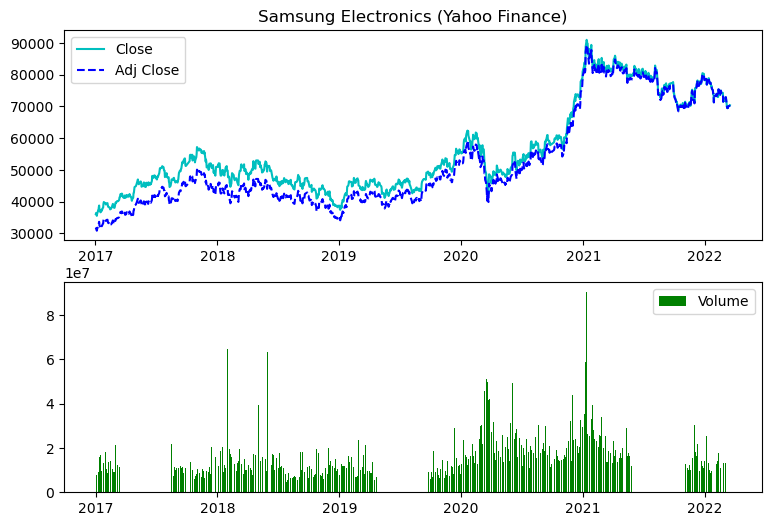

In [129]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt

df = pdr.get_data_yahoo('005930.KS', '2017-01-01')

plt.figure(figsize=(9,6))
plt.subplot(2,1,1)
plt.title('Samsung Electronics (Yahoo Finance)')
plt.plot(df.index, df['Close'], 'c', label='Close')
plt.plot(df.index, df['Adj Close'], 'b--', label='Adj Close')
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.bar(df.index, df['Volume'], color='g', label='Volume')
plt.legend(loc='best')
plt.show()

In [117]:
#### 신버전으로 캔들 차트 만들기

# ch04_01_Celltrion_PlotChart.py
import pandas as pd
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

from matplotlib import dates as mdates
import mplfinance as mpf
from datetime import datetime

# 4.4.3 맨 뒤 페이지 숫자 구하기
url = 'https://finance.naver.com/item/sise_day.naver?code=035720&page=1'  #카카오
html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
s = str(pgrr.a['href']).split('=')
last_page = s[-1]  

# 4.4.4 전체 페이지 읽어오기
df = pd.DataFrame()
from tqdm.notebook import tqdm


sise_url = 'https://finance.naver.com/item/sise_day.naver?code=035720'  
for page in tqdm(range(1, int(50)+1)):
    url = '{}&page={}'.format(sise_url, page)  
    html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = df.append(pd.read_html(html, header=0)[0])
    
    

  0%|          | 0/50 [00:00<?, ?it/s]

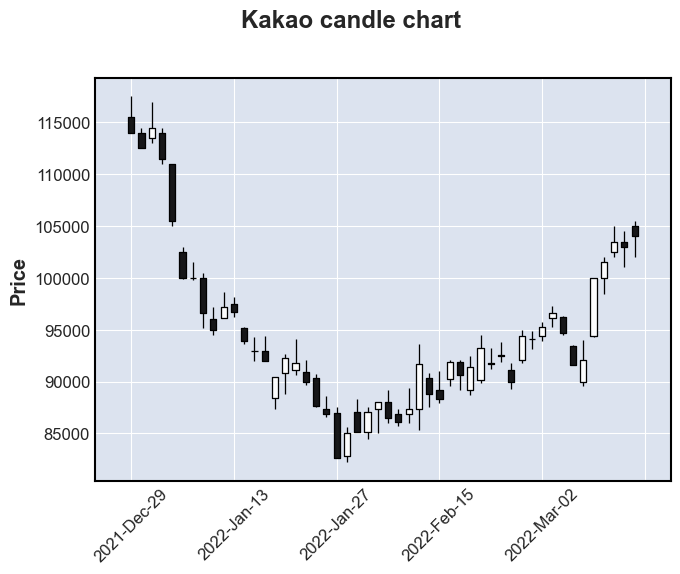

In [119]:
#차트 출력을 위해 데이터프레임 가공하기

df = df.dropna()
df = df.iloc[0:50]

df = df.rename(columns = {'날짜':'Date', '시가':'Open', '고가':'High', '저가':'Low', 
                          '종가':'Close', '거래량':'Volume'})
df = df.sort_values(by='Date')
df.index = pd.to_datetime(df.Date)
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]


mpf.plot(df, title='Kakao candle chart', type='candle')


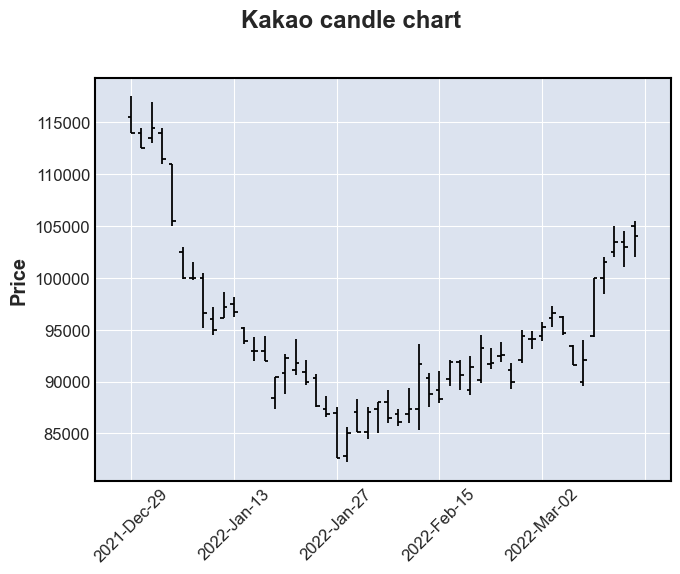

In [120]:
mpf.plot(df, title='Kakao candle chart', type='ohlc')


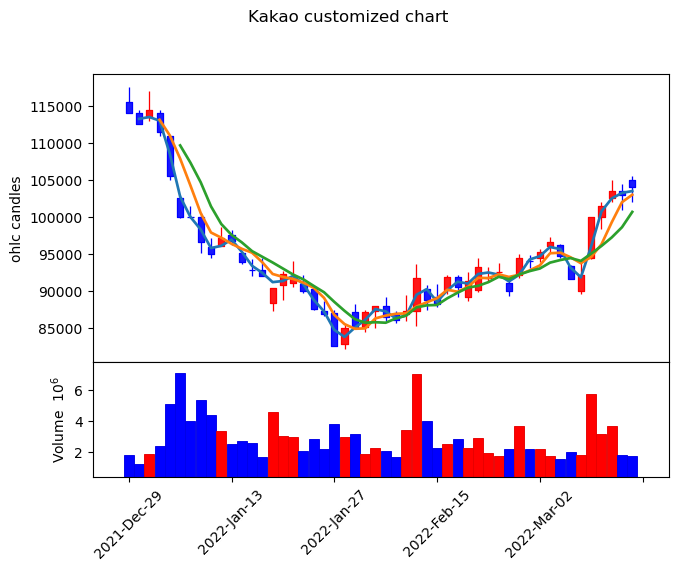

In [121]:
kwargs = dict(title='Kakao customized chart', type='candle',
              mav=(2,4,6), volume=True, ylabel='ohlc candles')
mc = mpf.make_marketcolors(up='r', down = 'b', inherit=True)
s = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df, **kwargs, style=s)

### 4.4.3 카카오 캔들 차트


In [95]:
# ch04_01_Celltrion_PlotChart.py
import pandas as pd
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt




In [96]:
from matplotlib import dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
from datetime import datetime

In [97]:
# 4.4.3 맨 뒤 페이지 숫자 구하기
url = 'https://finance.naver.com/item/sise_day.naver?code=035720&page=1'  #카카오
html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
s = str(pgrr.a['href']).split('=')
last_page = s[-1]  

In [104]:
# 4.4.4 전체 페이지 읽어오기
df = pd.DataFrame()
from tqdm.notebook import tqdm


sise_url = 'https://finance.naver.com/item/sise_day.naver?code=035720'  
for page in tqdm(range(1, int(50)+1)):
    url = '{}&page={}'.format(sise_url, page)  
    html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = df.append(pd.read_html(html, header=0)[0])

  0%|          | 0/50 [00:00<?, ?it/s]

In [105]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022.03.16,104000.0,1000.0,105000.0,105500.0,102000.0,1747104.0
2,2022.03.15,103000.0,500.0,103500.0,104500.0,101000.0,1778162.0
3,2022.03.14,103500.0,2000.0,102500.0,105000.0,102000.0,3656814.0
4,2022.03.11,101500.0,1500.0,100000.0,102000.0,98400.0,3160552.0
...,...,...,...,...,...,...,...
10,2020.03.11,169000.0,4000.0,172000.0,174500.0,167000.0,550227.0
11,2020.03.10,173000.0,5500.0,164500.0,174500.0,164000.0,950875.0
12,2020.03.09,167500.0,8000.0,171000.0,171500.0,166000.0,805638.0
13,2020.03.06,175500.0,4000.0,176500.0,178500.0,174000.0,568424.0


In [106]:
#차트 출력을 위해 데이터프레임 가공하기

df = df.dropna()
df = df.iloc[0:50]
df = df.sort_values(by='날짜')

In [107]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
13,2021.12.29,114000.0,500.0,115500.0,117500.0,114000.0,1791503.0
12,2021.12.30,112500.0,1500.0,114000.0,114500.0,112500.0,1223078.0
11,2022.01.03,114500.0,2000.0,113500.0,117000.0,113000.0,1846049.0
10,2022.01.04,111500.0,3000.0,114000.0,114500.0,111000.0,2396207.0
9,2022.01.05,105500.0,6000.0,111000.0,111000.0,105000.0,5108428.0
5,2022.01.06,100000.0,5500.0,102500.0,103000.0,99900.0,7120428.0
4,2022.01.07,100000.0,0.0,100000.0,101500.0,99800.0,3962672.0
3,2022.01.10,96600.0,3400.0,100000.0,100500.0,95200.0,5377749.0
2,2022.01.11,95000.0,1600.0,96000.0,97200.0,94500.0,4382380.0
1,2022.01.12,97200.0,2200.0,96100.0,98600.0,96100.0,3354459.0


In [109]:
for idx in range(0, len(df)):
    dt = datetime.strptime(df['날짜'].values[idx], '%Y.%m.%d').date()
    df['날짜'].values[idx] = mdates.date2num(dt)
    
ohlc = df[['날짜', '시가', '고가', '저가', '종가']]

In [110]:
ohlc

,날짜,시가,고가,저가,종가
13,18990.0,115500.0,117500.0,114000.0,114000.0
12,18991.0,114000.0,114500.0,112500.0,112500.0
11,18995.0,113500.0,117000.0,113000.0,114500.0
10,18996.0,114000.0,114500.0,111000.0,111500.0
9,18997.0,111000.0,111000.0,105000.0,105500.0
5,18998.0,102500.0,103000.0,99900.0,100000.0
4,18999.0,100000.0,101500.0,99800.0,100000.0
3,19002.0,100000.0,100500.0,95200.0,96600.0
2,19003.0,96000.0,97200.0,94500.0,95000.0
1,19004.0,96100.0,98600.0,96100.0,97200.0


In [92]:
ohlc = df[['날짜', '시가', '고가', '저가', '종가']]

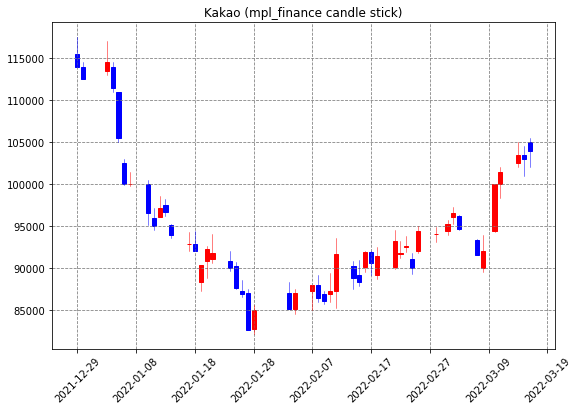

In [114]:
plt.figure(figsize=(9,6))
ax = plt.subplot(1,1,1)
plt.title('Kakao (mpl_finance candle stick)')
candlestick_ohlc(ax, ohlc.values, width = 0.7, colorup='red', colordown = 'blue')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.grid(color='gray', linestyle='--')
plt.show()

In [94]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
13,18990.0,114000.0,500.0,115500.0,117500.0,114000.0,1791503.0
12,18991.0,112500.0,1500.0,114000.0,114500.0,112500.0,1223078.0
11,18995.0,114500.0,2000.0,113500.0,117000.0,113000.0,1846049.0
10,18996.0,111500.0,3000.0,114000.0,114500.0,111000.0,2396207.0
9,18997.0,105500.0,6000.0,111000.0,111000.0,105000.0,5108428.0
5,18998.0,100000.0,5500.0,102500.0,103000.0,99900.0,7120428.0
4,18999.0,100000.0,0.0,100000.0,101500.0,99800.0,3962672.0
3,19002.0,96600.0,3400.0,100000.0,100500.0,95200.0,5377749.0
2,19003.0,95000.0,1600.0,96000.0,97200.0,94500.0,4382380.0
1,19004.0,97200.0,2200.0,96100.0,98600.0,96100.0,3354459.0


In [93]:
ohlc

,날짜,시가,고가,저가,종가
13,18990.0,115500.0,117500.0,114000.0,114000.0
12,18991.0,114000.0,114500.0,112500.0,112500.0
11,18995.0,113500.0,117000.0,113000.0,114500.0
10,18996.0,114000.0,114500.0,111000.0,111500.0
9,18997.0,111000.0,111000.0,105000.0,105500.0
5,18998.0,102500.0,103000.0,99900.0,100000.0
4,18999.0,100000.0,101500.0,99800.0,100000.0
3,19002.0,100000.0,100500.0,95200.0,96600.0
2,19003.0,96000.0,97200.0,94500.0,95000.0
1,19004.0,96100.0,98600.0,96100.0,97200.0


In [90]:
df['날짜'].values[idx]

19067.0

### 4.5.2. 셀트리온 종가 차트 

In [44]:
# ch04_01_Celltrion_PlotChart.py
import pandas as pd
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

# 4.4.3 맨 뒤 페이지 숫자 구하기
url = 'https://finance.naver.com/item/sise_day.naver?code=035720&page=1'  #카카오
html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
s = str(pgrr.a['href']).split('=')
last_page = s[-1]  

In [69]:
# 4.4.4 전체 페이지 읽어오기
df = pd.DataFrame()
from tqdm.notebook import tqdm


sise_url = 'https://finance.naver.com/item/sise_day.naver?code=035720'  
for page in tqdm(range(1, int(last_page)+1)):
    url = '{}&page={}'.format(sise_url, page)  
    html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = df.append(pd.read_html(html, header=0)[0])

  0%|          | 0/549 [00:00<?, ?it/s]

In [58]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
13,2022.01.27,82600.0,4300.0,87000.0,87500.0,82600.0,3793749.0
12,2022.01.28,85000.0,2400.0,82800.0,85600.0,82200.0,2958280.0
11,2022.02.03,85100.0,100.0,87100.0,88300.0,85100.0,3118696.0
10,2022.02.04,87100.0,2000.0,85100.0,87500.0,84500.0,1870626.0
9,2022.02.07,88000.0,900.0,87300.0,88000.0,85000.0,2224116.0
5,2022.02.08,86500.0,1500.0,88000.0,89200.0,86000.0,2030457.0
4,2022.02.09,86100.0,400.0,86900.0,87300.0,85700.0,1640629.0
3,2022.02.10,87300.0,1200.0,86900.0,89400.0,86000.0,3401352.0
2,2022.02.11,91700.0,4400.0,87300.0,93600.0,85300.0,7012496.0
1,2022.02.14,88800.0,2900.0,90300.0,90800.0,87500.0,4002853.0


In [76]:
#차트 출력을 위해 데이터프레임 가공하기

df = df.dropna()
df = df.iloc[0:50]
df = df.sort_values(by='날짜')

In [77]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
13,2020.12.24,374000.0,3500.0,378500.0,380000.0,372000.0,465132.0
12,2020.12.28,373000.0,1000.0,374500.0,377000.0,369500.0,646464.0
11,2020.12.29,384500.0,11500.0,381000.0,385500.0,378000.0,857404.0
10,2020.12.30,389500.0,5000.0,384500.0,394000.0,383500.0,813142.0
9,2021.01.04,396000.0,6500.0,392000.0,396500.0,385500.0,853740.0
5,2021.01.05,393000.0,3000.0,393000.0,395500.0,387000.0,748559.0
4,2021.01.06,395500.0,2500.0,395000.0,410000.0,394500.0,1435715.0
3,2021.01.07,402500.0,7000.0,402000.0,403500.0,393000.0,775191.0
2,2021.01.08,434000.0,31500.0,413000.0,436000.0,404500.0,2466715.0
1,2021.01.11,453000.0,19000.0,441000.0,463000.0,429000.0,3157747.0


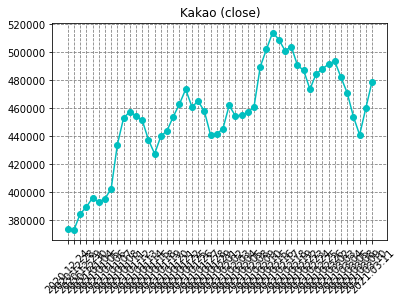

In [78]:
#날짜, 종가 칼럼으로 차트 그리기

plt.title('Kakao (close)')
plt.xticks(rotation = 45)
plt.plot(df['날짜'], df['종가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()


In [45]:
last_page

'549'

In [ ]:
https://finance.naver.com/item/main.naver?code=035720

In [40]:
# ch04_01_Celltrion_PlotChart.py
import pandas as pd
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt

# 4.4.3 맨 뒤 페이지 숫자 구하기
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'
html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
s = str(pgrr.a['href']).split('=')
last_page = s[-1]  

In [41]:
# 4.4.4 전체 페이지 읽어오기
df = pd.DataFrame()
from tqdm.notebook import tqdm


sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'  
for page in tqdm(range(1, int(last_page)+1)):
    url = '{}&page={}'.format(sise_url, page)  
    html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = df.append(pd.read_html(html, header=0)[0])

  0%|          | 0/412 [00:00<?, ?it/s]

In [38]:
# 4.4.4 전체 페이지 읽어오기
df = pd.DataFrame()
from tqdm.notebook import tqdm


sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'  
for page in tqdm(range(1, int(3)+1)):
    url = '{}&page={}'.format(sise_url, page)  
    html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = df.append(pd.read_html(html, header=0)[0])

  0%|          | 0/3 [00:00<?, ?it/s]

In [39]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022.03.16,181000.0,1000.0,182000.0,182500.0,179000.0,338904.0
2,2022.03.15,180000.0,500.0,181500.0,183000.0,176000.0,580204.0
3,2022.03.14,180500.0,7500.0,183500.0,188500.0,178500.0,1451284.0
4,2022.03.11,173000.0,0.0,173500.0,180000.0,171000.0,803036.0
5,2022.03.10,173000.0,3000.0,173000.0,173500.0,168500.0,618850.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022.03.08,170000.0,5000.0,163500.0,174000.0,162500.0,686569.0


In [27]:
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2022.03.16,181000.0,1000.0,182000.0,182500.0,179000.0,338904.0
1,2022.03.15,180000.0,500.0,181500.0,183000.0,176000.0,580204.0
2,2022.03.14,180500.0,7500.0,183500.0,188500.0,178500.0,1451284.0
3,2022.03.11,173000.0,0.0,173500.0,180000.0,171000.0,803036.0
4,2022.03.10,173000.0,3000.0,173000.0,173500.0,168500.0,618850.0
...,...,...,...,...,...,...,...
9,2020.03.11,175000.0,6000.0,180000.0,182000.0,173000.0,816884.0
10,2020.03.10,181000.0,7000.0,172000.0,181000.0,169000.0,1203990.0
11,2020.03.09,174000.0,3500.0,175000.0,180500.0,173500.0,992060.0
12,2020.03.06,177500.0,4500.0,181500.0,183000.0,177000.0,706838.0


In [19]:
url

'https://finance.naver.com/item/sise_day.nhn?code=068270&page=412'

In [18]:
print(df)

            날짜        종가     전일비        시가        고가        저가        거래량
0          NaN       NaN     NaN       NaN       NaN       NaN        NaN
1   2022.03.16  181000.0  1000.0  182000.0  182500.0  179000.0   338904.0
2   2022.03.15  180000.0   500.0  181500.0  183000.0  176000.0   580204.0
3   2022.03.14  180500.0  7500.0  183500.0  188500.0  178500.0  1451284.0
4   2022.03.11  173000.0     0.0  173500.0  180000.0  171000.0   803036.0
..         ...       ...     ...       ...       ...       ...        ...
10  2005.07.21    5740.0   810.0    6450.0    6580.0    5730.0   182685.0
11  2005.07.20    6550.0  1150.0    7690.0    7690.0    6550.0   422688.0
12  2005.07.19    7700.0  2500.0    6700.0    7700.0    6510.0   499088.0
13         NaN       NaN     NaN       NaN       NaN       NaN        NaN
14         NaN       NaN     NaN       NaN       NaN       NaN        NaN

[6180 rows x 7 columns]


In [17]:
pd.read_html(html, header=0)[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005.07.29,5320.0,130.0,5450.0,5450.0,5250.0,57927.0
2,2005.07.28,5450.0,200.0,5680.0,5730.0,5450.0,41633.0
3,2005.07.27,5650.0,90.0,5560.0,5780.0,5530.0,44648.0
4,2005.07.26,5560.0,90.0,5830.0,5880.0,5560.0,39832.0
5,2005.07.25,5650.0,70.0,5500.0,5950.0,5500.0,61036.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2005.07.22,5580.0,160.0,5850.0,5850.0,5530.0,69921.0


In [14]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022.03.16,181000.0,1000.0,182000.0,182500.0,179000.0,338904.0
2,2022.03.15,180000.0,500.0,181500.0,183000.0,176000.0,580204.0
3,2022.03.14,180500.0,7500.0,183500.0,188500.0,178500.0,1451284.0
4,2022.03.11,173000.0,0.0,173500.0,180000.0,171000.0,803036.0
...,...,...,...,...,...,...,...
10,2005.07.21,5740.0,810.0,6450.0,6580.0,5730.0,182685.0
11,2005.07.20,6550.0,1150.0,7690.0,7690.0,6550.0,422688.0
12,2005.07.19,7700.0,2500.0,6700.0,7700.0,6510.0,499088.0
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from tqdm.notebook import tqdm
for i in tqdm(range(100)):
    sleep(3)

In [ ]:
# 차트 출력을 위해 데이터프레임 가공하기
df = df.dropna()
df = df.iloc[0:30]  # ①
df = df.sort_values(by='날짜')  # ②

# 날짜, 종가 컬럼으로 차트 그리기
plt.title('Celltrion (close)')
plt.xticks(rotation=45)  # ③
plt.plot(df['날짜'], df['종가'], 'co-')  # ④
plt.grid(color='gray', linestyle='--')
plt.show()

In [9]:
from time import sleep
from tqdm import tqdm
for i in tqdm(range(10)):
    sleep(3)

100%|██████████| 10/10 [00:30<00:00,  3.01s/it]


In [6]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'  
for page in range(1, int(last_page)+1): 
    page_url = '{}&page={}'.format(sise_url, page)  
    df = df.append(pd.read_html(page_url, header=0)[0])

ValueError: No tables found